In [73]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

128 128


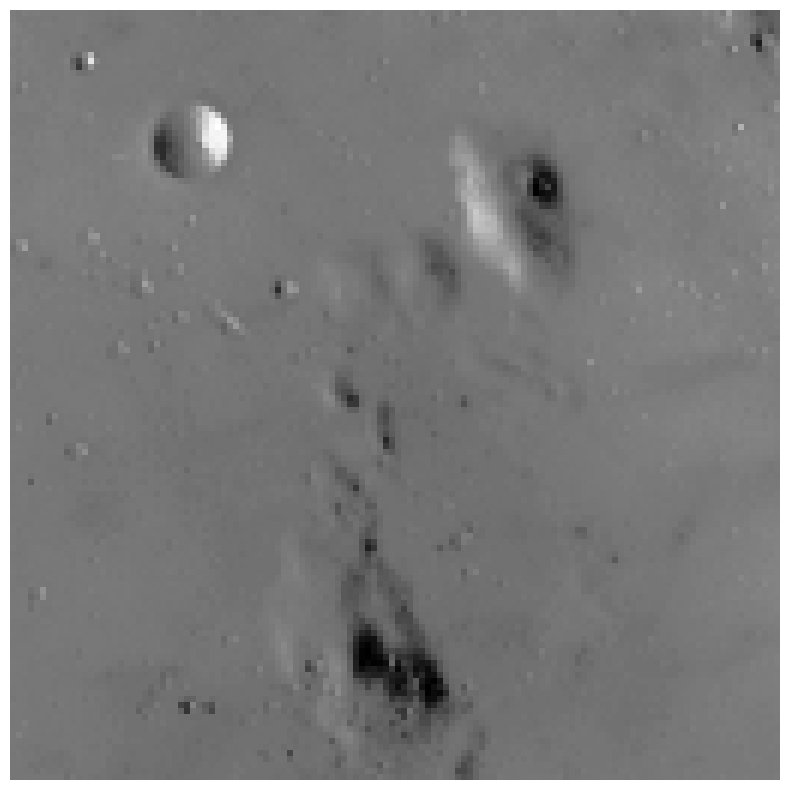

In [74]:
img_crowd = cv2.imread("moo2.png")
h, w = img_crowd.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img_crowd, cv2.COLOR_RGB2GRAY), cmap="gray")

# Histogram Equalization

In [75]:
def l_count_per_pixel(image, normFlag):
    possible_l = 256
    pix_counts = [0] * possible_l # store number of pixels for each possible l value

    w, h = image.shape[:2]

    l_val = 0

    for y in range(h):
        for x in range(w):
            # for each pixel, get l value
            l_val = image[x,y][0]

            pix_counts[l_val] = pix_counts[l_val] + 1

    # if flagged, normalize
    if(normFlag):
        for i in range(len(pix_counts)):
            pix_counts[i] = pix_counts[i]/(w*h)

    print(np.sum(pix_counts))
    return pix_counts

In [76]:
def image_histogram_equalization(image, number_bins=256):
    img_array = np.asarray(image)
    w, h = image.shape[:2]

    """
    Part (a): Normalized cumulative histogram
    """
    # Calculate histogram aka probability density function via binning, and normalize
    
    hist = l_count_per_pixel(image, 1)
    plot_hist(hist)
    
    # Calculate cumulative histogram aka cumulative density function (CDF?)
    chistogram_array = np.empty([256,1])

    #integrate histogram to get cdf
    sum = 0

    term = 1/(w*h)

    for i in range(0, 256):
        sum = 0
        for j in range(0, i):
            sum = sum + hist[j]
        chistogram_array[i] = term * sum 

    #plot_hist(chistogram_array)    


    """
    Part (c): compute the transform map T using cdf
    """
    transform_map = np.empty([256,1]).astype(np.uint8)
    
    #for every possible l value
    for i in range(0, 256):
        sum = 0
        for j in range(0, i):
            sum = sum + chistogram_array[j]
        transform_map[i] = 255 * sum

    """
    STEP 3: Apply the transformation T to reassign equalized pixel intensity 
    """    
    # transform pixel values to equalize -- insert code

    for y in range(h):
        for x in range(w):
            # for each pixel, get l value
            index = image[x,y][0]

            image[x,y] = transform_map[index]

    # reshape and write back into img_array
    eq_img_array = image

    hist = l_count_per_pixel(image, 1)
    plot_hist(hist)

    return eq_img_array

In [77]:
def plot_hist(plot):
    # plot the normalized histogram
    plt.figure()
    plt.title("Grayscale Histogram (Normalized)")
    plt.xlabel("Bins")
    plt.ylabel("% of Pixels")
    plt.plot(plot)
    plt.xlim([0, 256])
    plt.show()

In [78]:
pix_counts = l_count_per_pixel(img_crowd, 0)
pix_counts_norm = l_count_per_pixel(img_crowd, 1)

#plot_hist(pix_counts)
#plot_hist(pix_counts_norm)

16384
1.0


1.0


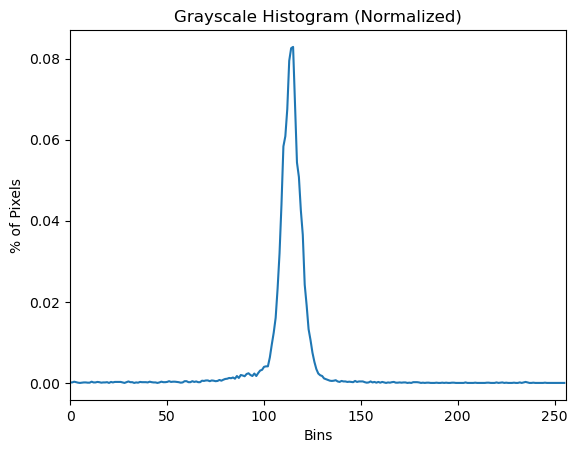

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


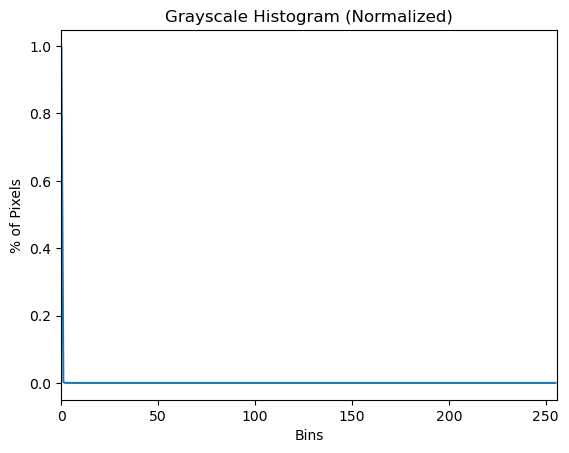

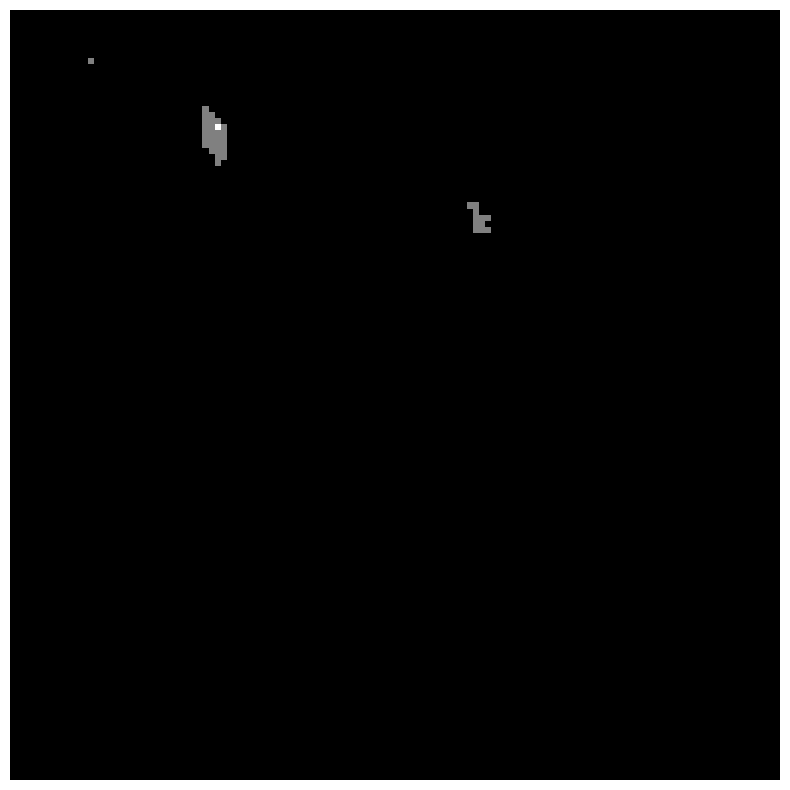

In [79]:
img_equalized = image_histogram_equalization(img_crowd)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY), cmap="gray")

## Process multiple images

720 1280


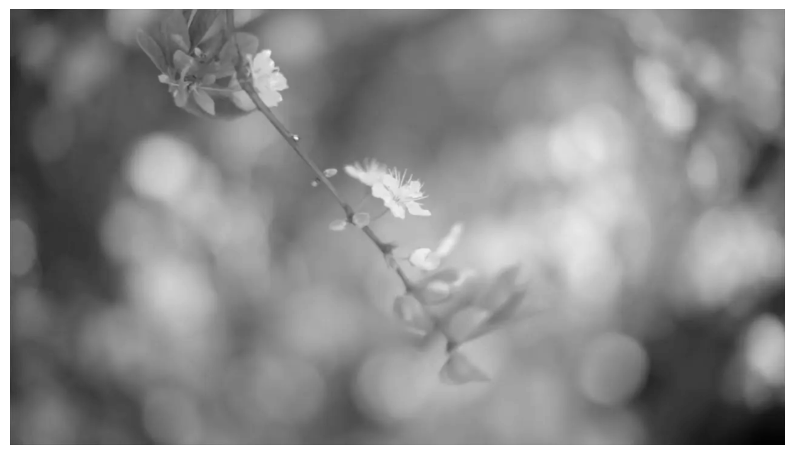

In [80]:
img_crowd = cv2.imread("flower.png")
h, w = img_crowd.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img_crowd, cv2.COLOR_RGB2GRAY), cmap="gray")

1.0


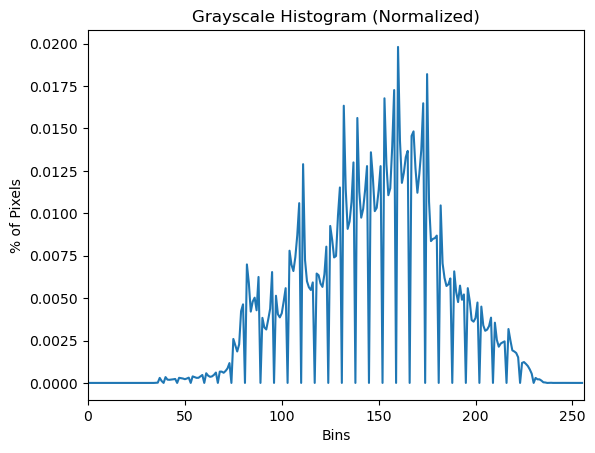

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


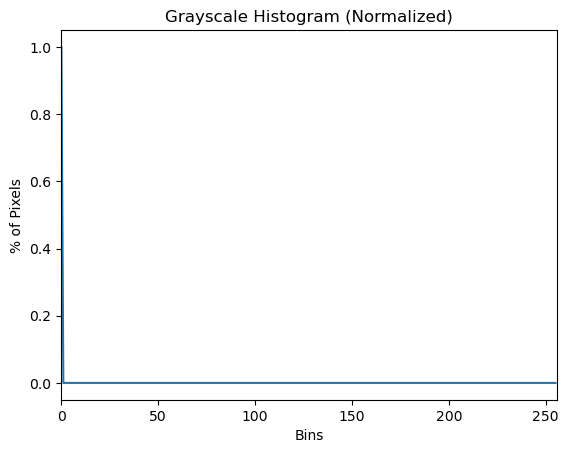

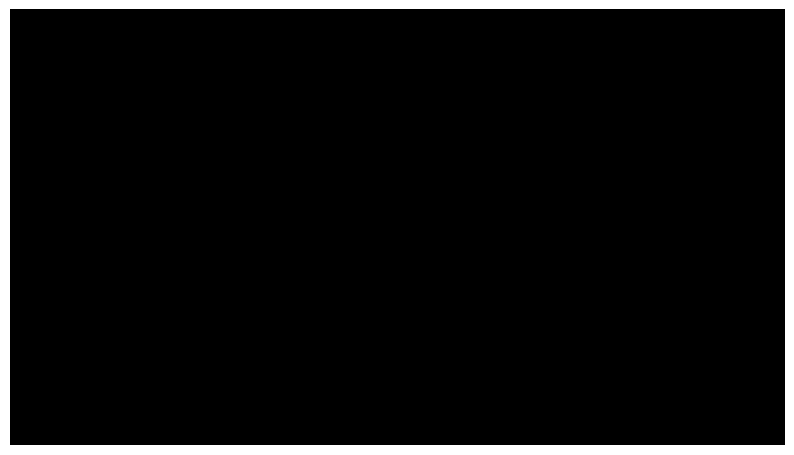

In [81]:
img_equalized = image_histogram_equalization(img_crowd)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY), cmap="gray")